# Introducing Dependencies

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, optimizers, datasets, Sequential
from tensorflow.keras.layers import Conv2D,Activation,MaxPooling2D,Dropout,Flatten,Dense
from tensorflow.keras.callbacks import ModelCheckpoint
import os
import numpy as np
import matplotlib.pyplot as plt

# Data Preprocessing

In [2]:
#download Cifar-10 dataset
(x_train,y_train), (x_test, y_test) = datasets.cifar10.load_data()
#print the size of the dataset
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
print(y_train[0])
#Convert the category label into onehot encoding
num_classes = 10
y_train_onehot = keras.utils.to_categorical(y_train, num_classes)
y_test_onehot = keras.utils.to_categorical(y_test, num_classes)
y_train[0]

170508288/170498071 [==============================] - 3s 0us/step
(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)
[6]


array([6], dtype=uint8)

# Show the first 9 images

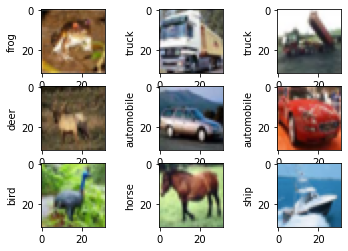

In [3]:
#Create a image tag list
category_dict = {0:'airplane',1:'automobile',2:'bird',3:'cat',4:'deer',5:'dog',6:'frog',7:'horse',8:'ship',9:'truck'}
#Show the first 9 images and their labels
plt.figure()
for i in range(9):
  #create a figure with 9 subplots
  plt.subplot(3,3,i+1)
  #show an image
  plt.imshow(x_train[i])
  #show the label
  plt.ylabel(category_dict[y_train[i][0]])
plt.show()

In [4]:
#Pixel normalization
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

# Model Creation

In [5]:
def CNN_classification_model(input_size = x_train.shape[1:]):
  model = Sequential()
  #the first block with 2 convolutional layers and 1 maxpooling layer
  '''Conv1 with 32 3*3 kernels
  padding="same": it applies zero padding to the input image so that the input image gets fully covered by
  the filter and specified stride.
  It is called SAME because, for stride 1 , the output will be the same as the input.
  output: 32*32*32'''
  model.add(Conv2D(32, (3, 3), padding='same',input_shape=input_size))
  #relu activation function
  model.add(Activation('relu'))
  #Conv2
  model.add(Conv2D(64, (3, 3)))
  model.add(Activation('relu'))
  model.add(Conv2D(64, (3, 3)))
  model.add(Activation('relu'))
  #maxpooling
  model.add(MaxPooling2D(pool_size=(2, 2),strides =1))
  #the second block
  model.add(Conv2D(32, (3, 3), padding='same'))
  model.add(Activation('relu'))
  model.add(Conv2D(32, (3, 3)))
  model.add(Activation('relu'))
  #maxpooling.the default strides =1
  model.add(MaxPooling2D(pool_size=(2, 2)))
  #Before sending a feature map into a fully connected network, it should be flattened into a column vector.
  model.add(Flatten())
  #fully connected layer
  model.add(Dense(64))
  model.add(Activation('relu'))
  #dropout layer.every neuronis set to 0 with a probability of 0.25
  model.add(Dropout(0.5))
  model.add(Dense(num_classes))
  #map the score of each class into probability
  model.add(Activation('softmax'))
  opt = keras.optimizers.Adam(lr=0.0001)
  model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
  return model

# Model Training

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
model_name = "final_cifar10.h5"
model_checkpoint = ModelCheckpoint(model_name, monitor='loss',verbose=1, save_best_only=True)
model=CNN_classification_model()
#load pretrained models
trained_weights_path = 'cifar10_weights.h5'
if os.path.exists(trained_weights_path):
  model.load_weights(trained_weights_path, by_name =True)
#train
history=model.fit(x_train,y_train, batch_size=64, epochs=100,callbacks = [model_checkpoint],verbose=1,validation_split=0.2)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
623/625 [============================>.] - ETA: 0s - loss: 1.9262 - accuracy: 0.2960
Epoch 1: loss improved from inf to 1.92562, saving model to final_cifar10.h5
625/625 [==============================] - 21s 15ms/step - loss: 1.9256 - accuracy: 0.2964 - val_loss: 1.6167 - val_accuracy: 0.4329
Epoch 2/100
625/625 [==============================] - ETA: 0s - loss: 1.6615 - accuracy: 0.3991
Epoch 2: loss improved from 1.92562 to 1.66153, saving model to final_cifar10.h5
625/625 [==============================] - 9s 15ms/step - loss: 1.6615 - accuracy: 0.3991 - val_loss: 1.4624 - val_accuracy: 0.4806
Epoch 3/100
623/625 [============================>.] - ETA: 0s - loss: 1.5598 - accuracy: 0.4382
Epoch 3: loss improved from 1.66153 to 1.55944, saving model to final_cifar10.h5
625/625 [==============================] - 9s 14ms/step - loss: 1.5594 - accuracy: 0.4385 - val_loss: 1.3940 - val_accuracy: 0.5101
Epoch 4/100
623/625 [============================>.] - ETA: 0s - loss: 1.

KeyboardInterrupt: ignored

In [ ]:
plt.figure()
plt.plot(history.history['val_loss'],c='r',label="val_loss")
plt.plot(history.history['loss'],c='c',label="loss")
plt.title("Adam-LR=0.01")
plt.xlabel("Epoches")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
plt.figure()
plt.plot(history.history['val_accuracy'],c='r',label="val_accuracy")
plt.plot(history.history['accuracy'],c='c',label="accuracy")
plt.xlabel("Epoches")
plt.ylabel("accuracy")
plt.legend()
plt.show()

In [ ]:
new_model = CNN_classification_model()
new_model.load_weights('final_cifar10.h5')
model.evaluate(x_test, y_test, verbose=1)

In [ ]:
#output the possibility of each class
new_model.predict(x_test[0:1])

In [ ]:
#label list
pred_list = []
plt.figure()
for i in range(0,4):
  plt.subplot(2,2,i+1)
  #plot
  plt.imshow(x_test[i])
  #predict
  pred = new_model.predict(x_test[0:10])
  pred_list.append(pred)
  #Display actual and predicted labels of images
  plt.title("pred:"+category_dict[pred[i].argmax()]+" actual:"+ category_dict[y_test[i][0]])
  plt.axis('on')
plt.show()